In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    model_name = name_info[0]
    if name_info[1] in ['elic','HiFiC','jpeg']:
        defense = name_info[1]
    else:
        defense = 'None'
    attack = None
    for a in ['FGSM','iFGSM','PGD','DeepFool','CW']:
        if a in name_info:
            attack = a
    through = False
    if name_info[-1] == 'through':
        through = True
    strength = name_info[2]
    return [model_name,attack,defense,strength,through]+[v for v in df.values[0]]
    

def line_print(i):
    if i%14 == 0:
        line = '\\hline'
    elif i%7 ==0:
        line = '\\cline{2-8}'
    elif i%7 in [1,3,5]:
        line = '\\cline{3-8}'
    else:
        line = '\\cline{4-8}'
    return line
    
cell_colors= 'lightgray,lightblue,darkblue,lightred,darkred,lightgreen,darkgreen'.split(',')
def cell_color(i):
    return cell_colors[(i-1)%7]
    
colors={'None':'gray','jpeg':'blue', 'HiFiC':'red','ELIC':'green'}
def plot_row(df,title,ax,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,3]:
            ax.plot([0,*df.columns[5:]], df.iloc[i,4:], marker='o', label=df.iloc[i,2]+'_T',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot([0,*df.columns[5:]], df.iloc[i,4:], marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy')
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    order = [4,6,5,3,2,1,0]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    #plt.savefig(f'{f_name}.pdf',format='pdf')
    #plt.show()
    return ax


In [26]:
exp_path = 'results/ablation/ELIC/'
results = pd.DataFrame(columns=['model_name','attack','defense','strength','through','baseline','2/255','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results.loc[i] = result_parser(f)
results

,model_name,attack,defense,strength,through,baseline,2/255,4/255,8/255,12/255
0,ResNet50,iFGSM,elic,0004,False,0.901401,0.901656,0.899108,0.897325,0.901401
1,ResNet50,iFGSM,elic,0004,True,0.900892,0.714140,0.512866,0.261146,0.154140
2,ResNet50,iFGSM,elic,0008,False,0.956943,0.959490,0.956178,0.952866,0.954650
3,ResNet50,iFGSM,elic,0008,True,0.956433,0.761019,0.533758,0.274650,0.169936
4,ResNet50,iFGSM,elic,0016,False,0.983439,0.981656,0.981146,0.978599,0.978599
5,ResNet50,iFGSM,elic,0016,True,0.984204,0.784713,0.542420,0.288917,0.180127
6,ResNet50,iFGSM,elic,0032,False,0.992357,0.990318,0.990318,0.989045,0.984204
7,ResNet50,iFGSM,elic,0032,True,0.992102,0.782930,0.512102,0.242803,0.142166
8,ResNet50,iFGSM,elic,0150,False,0.997707,0.996943,0.994395,0.984204,0.950828
9,ResNet50,iFGSM,elic,0150,True,0.997707,0.696306,0.371210,0.153885,0.092484


In [27]:
exp_path = 'results/ablation/JPEG/'
results_jpeg = pd.DataFrame(columns=['model_name','attack','defense','strength','through','baseline','2/255','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_jpeg.loc[i] = result_parser(f)
results_jpeg

,model_name,attack,defense,strength,through,baseline,2/255,4/255,8/255,12/255
0,ResNet50,iFGSM,jpeg,10.0,False,0.984713,0.982930,0.981656,0.978599,0.976561
1,ResNet50,iFGSM,jpeg,10.0,True,0.984713,0.450701,0.292229,0.204586,0.164586
2,ResNet50,iFGSM,jpeg,15.0,False,0.990573,0.989554,0.987516,0.984204,0.978599
3,ResNet50,iFGSM,jpeg,15.0,True,0.990573,0.443567,0.302675,0.217580,0.180382
4,ResNet50,iFGSM,jpeg,25.0,False,0.995669,0.993885,0.990573,0.985478,0.971975
5,ResNet50,iFGSM,jpeg,25.0,True,0.995669,0.421401,0.289172,0.205350,0.168917
6,ResNet50,iFGSM,jpeg,35.0,False,0.996943,0.995159,0.992611,0.978854,0.954904
7,ResNet50,iFGSM,jpeg,35.0,True,0.996943,0.398471,0.281019,0.195159,0.146497
8,ResNet50,iFGSM,jpeg,5.0,False,0.930955,0.933248,0.931720,0.926879,0.928917
9,ResNet50,iFGSM,jpeg,5.0,True,0.930955,0.384459,0.224459,0.145478,0.114140


In [28]:
exp_path = 'results/ablation/HiFiC/'
results_hific = pd.DataFrame(columns=['model_name','attack','defense','strength','through','baseline','2/255','4/255','8/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_hific.loc[i] = result_parser(f)
results_hific

,model_name,attack,defense,strength,through,baseline,2/255,4/255,8/255,12/255
0,ResNet50,iFGSM,None,hi,False,0.991847,0.991083,0.986242,0.977834,0.968153
1,ResNet50,iFGSM,None,hi,True,0.991847,0.530701,0.302420,0.148280,0.085350
2,ResNet50,iFGSM,None,low,False,0.975796,0.973248,0.967389,0.965096,0.956433
3,ResNet50,iFGSM,None,low,True,0.975796,0.609936,0.376051,0.201274,0.125605
4,ResNet50,iFGSM,None,med,False,0.994650,0.992866,0.990573,0.982675,0.977834
5,ResNet50,iFGSM,None,med,True,0.994650,0.538854,0.309809,0.158217,0.105987
6,Vit,iFGSM,None,hi,False,0.998471,0.991592,0.971465,0.868280,0.698599
7,Vit,iFGSM,None,hi,True,0.998471,0.361783,0.100127,0.018599,0.005605
8,Vit,iFGSM,None,low,False,0.994650,0.991338,0.990064,0.982675,0.966624
9,Vit,iFGSM,None,low,True,0.994650,0.574777,0.255032,0.083312,0.038217


In [29]:
def line_print(i):
    if i%12 == 0:
        line = '\\hline'
    elif i%2 ==0:
        line = '\\cline{2-8}'
    else:
        line = '\\cline{3-8}'
    return line

cell_colors= 'lightgray,gray'.split(',')
def cell_color(i):
    return cell_colors[(i-1)%2]
    
defenses =  ['0004','0008','0016','0032','0150','0450']
models = 'ResNet50,Vit'.split(',')
results = results.round(3)

i = 1
for model in models:
    m = '\\multirow{7}{*}{'+f'{model}'+'}'
    for defense in defenses:
        l = len(results.loc[results['model_name'] == model].loc[results['strength'] == defense])
        if l > 1:
            d = '\\multirow{'+f'{l}'+'}{*}{'+f'{defense}'+'}'
        else:
            d = defense
        for t in [False,True]:
            r = results.loc[results['model_name'] == model].loc[results['strength'] == defense].loc[results['through'] == t].values
            print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))
            a,m,d = ' ',' ',' '
            i = i+1


\multirow{7}{*}{ResNet50}  &  \multirow{2}{*}{0004}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.901 &  \cellcolor{lightgray}0.902 &  \cellcolor{lightgray}0.899 &  \cellcolor{lightgray}0.897 &  \cellcolor{lightgray} 0.901 \\  \cline{3-8}
   &     &  \cellcolor{gray}True &  \cellcolor{gray}0.901 &  \cellcolor{gray}0.714 &  \cellcolor{gray}0.513 &  \cellcolor{gray}0.261 &  \cellcolor{gray} 0.154 \\  \cline{2-8}
   &  \multirow{2}{*}{0008}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.957 &  \cellcolor{lightgray}0.959 &  \cellcolor{lightgray}0.956 &  \cellcolor{lightgray}0.953 &  \cellcolor{lightgray} 0.955 \\  \cline{3-8}
   &     &  \cellcolor{gray}True &  \cellcolor{gray}0.956 &  \cellcolor{gray}0.761 &  \cellcolor{gray}0.534 &  \cellcolor{gray}0.275 &  \cellcolor{gray} 0.17 \\  \cline{2-8}
   &  \multirow{2}{*}{0016}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.983 &  \cellcolor{lightgray}0.982 &  \cellcolor{lightgray}0.981 &  \cellcolor{lightgray}0.

<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_81902/931447184.py:29: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))
/tmp/ipykernel_81902/931447184.py:29: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))


In [30]:
def line_print(i):
    if i%16 == 0:
        line = '\\hline'
    elif i%2 ==0:
        line = '\\cline{2-8}'
    else:
        line = '\\cline{3-8}'
    return line

cell_colors= 'lightgray,gray'.split(',')
def cell_color(i):
    return cell_colors[(i-1)%2]
    
defenses =  '5.0,10.0,15.0,25.0,35.0,50.0,75.0,95.0'.split(',')
models = 'ResNet50,Vit'.split(',')
results_jpeg = results_jpeg.round(3)

i = 1
for model in models:
    m = '\\multirow{7}{*}{'+f'{model}'+'}'
    for defense in defenses:
        l = len(results_jpeg.loc[results_jpeg['model_name'] == model].loc[results_jpeg['strength'] == defense])
        if l > 1:
            d = '\\multirow{'+f'{l}'+'}{*}{'+f'{defense}'+'}'
        else:
            d = defense
        for t in [False,True]:
            r = results_jpeg.loc[results_jpeg['model_name'] == model].loc[results_jpeg['strength'] == defense].loc[results_jpeg['through'] == t].values
            print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))
            a,m,d = ' ',' ',' '
            i = i+1

\multirow{7}{*}{ResNet50}  &  \multirow{2}{*}{5.0}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.931 &  \cellcolor{lightgray}0.933 &  \cellcolor{lightgray}0.932 &  \cellcolor{lightgray}0.927 &  \cellcolor{lightgray} 0.929 \\  \cline{3-8}
   &     &  \cellcolor{gray}True &  \cellcolor{gray}0.931 &  \cellcolor{gray}0.384 &  \cellcolor{gray}0.224 &  \cellcolor{gray}0.145 &  \cellcolor{gray} 0.114 \\  \cline{2-8}
   &  \multirow{2}{*}{10.0}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.985 &  \cellcolor{lightgray}0.983 &  \cellcolor{lightgray}0.982 &  \cellcolor{lightgray}0.979 &  \cellcolor{lightgray} 0.977 \\  \cline{3-8}
   &     &  \cellcolor{gray}True &  \cellcolor{gray}0.985 &  \cellcolor{gray}0.451 &  \cellcolor{gray}0.292 &  \cellcolor{gray}0.205 &  \cellcolor{gray} 0.165 \\  \cline{2-8}
   &  \multirow{2}{*}{15.0}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.991 &  \cellcolor{lightgray}0.99 &  \cellcolor{lightgray}0.988 &  \cellcolor{lightgray}0.9

<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_81902/4221306362.py:29: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))
/tmp/ipykernel_81902/4221306362.py:29: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))


In [31]:
def line_print(i):
    if i%6 == 0:
        line = '\\hline'
    elif i%2 ==0:
        line = '\\cline{2-8}'
    else:
        line = '\\cline{3-8}'
    return line

cell_colors= 'lightgray,gray'.split(',')
def cell_color(i):
    return cell_colors[(i-1)%2]
    
defenses =  'low,med,hi'.split(',')
models = 'ResNet50,Vit'.split(',')
results_hific = results_hific.round(3)

i = 1
for model in models:
    m = '\\multirow{7}{*}{'+f'{model}'+'}'
    for defense in defenses:
        l = len(results_hific.loc[results_hific['model_name'] == model].loc[results_hific['strength'] == defense])
        if l > 1:
            d = '\\multirow{'+f'{l}'+'}{*}{'+f'{defense}'+'}'
        else:
            d = defense
        for t in [False,True]:
            r = results_hific.loc[results_hific['model_name'] == model].loc[results_hific['strength'] == defense].loc[results_hific['through'] == t].values
            print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))
            a,m,d = ' ',' ',' '
            i = i+1

\multirow{7}{*}{ResNet50}  &  \multirow{2}{*}{low}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.976 &  \cellcolor{lightgray}0.973 &  \cellcolor{lightgray}0.967 &  \cellcolor{lightgray}0.965 &  \cellcolor{lightgray} 0.956 \\  \cline{3-8}
   &     &  \cellcolor{gray}True &  \cellcolor{gray}0.976 &  \cellcolor{gray}0.61 &  \cellcolor{gray}0.376 &  \cellcolor{gray}0.201 &  \cellcolor{gray} 0.126 \\  \cline{2-8}
   &  \multirow{2}{*}{med}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.995 &  \cellcolor{lightgray}0.993 &  \cellcolor{lightgray}0.991 &  \cellcolor{lightgray}0.983 &  \cellcolor{lightgray} 0.978 \\  \cline{3-8}
   &     &  \cellcolor{gray}True &  \cellcolor{gray}0.995 &  \cellcolor{gray}0.539 &  \cellcolor{gray}0.31 &  \cellcolor{gray}0.158 &  \cellcolor{gray} 0.106 \\  \cline{2-8}
   &  \multirow{2}{*}{hi}  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.992 &  \cellcolor{lightgray}0.991 &  \cellcolor{lightgray}0.986 &  \cellcolor{lightgray}0.978 &

<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_81902/1462588939.py:29: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))
/tmp/ipykernel_81902/1462588939.py:29: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+str(r[0,j])+' & ' for j in [4,5,6,7,8]],'\cellcolor{'+ cell_color(i) + '}',r[0,9],'\\\\ ', line_print(i))


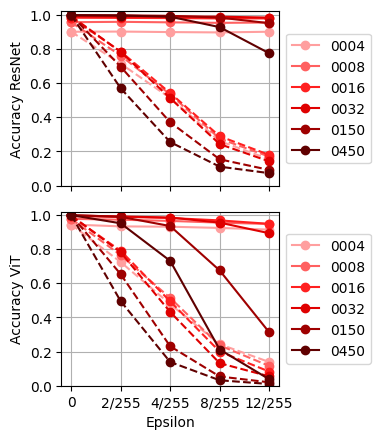

In [37]:
colors={'0004':'tab:gray','0008':'tab:blue', '0016':'tab:red','0032':'tab:green','0150':'tab:orange','0450':'tab:purple'}
COLORS={'0004':'#ff9f9f','0008':'#ff6060', '0016':'#ff2020','0032':'#df0000','0150':'#9f0000','0450':'#600000'}
def plot_row(df,title,ax,legend = False, colors = COLORS):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    # fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,4]:
            ax.plot([0,*df.columns[6:]], df.iloc[i,5:], marker='o', label='_nolegend_',color=colors[df.iloc[i,3]],linestyle='dashed')
        else:
            ax.plot([0,*df.columns[6:]], df.iloc[i,5:], marker='o', label=df.iloc[i,3],color=colors[df.iloc[i,3]])
    ax.set_xlabel('Epsilon')
    mod = 'ResNet' if legend else 'ViT'
    ax.set_ylabel('Accuracy '+mod)
    # plt.yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_ylim(0.0,1.02)
    # Place legend outside of plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.grid(True)
    f_name = title.replace(' ','_')
    return ax

fig, axes = plt.subplots(2,1,figsize=(4.0,4.5))
axs = axes.flatten()
i=0
legend = True

for model in models:
        df = results.loc[results['model_name'] == model]
        plot_row(df,'iFGSM_' +model,axs[i],legend)
        i = i+1
        legend = False

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()
fig.savefig('elic_abl.pdf',format='pdf',bbox_inches='tight')

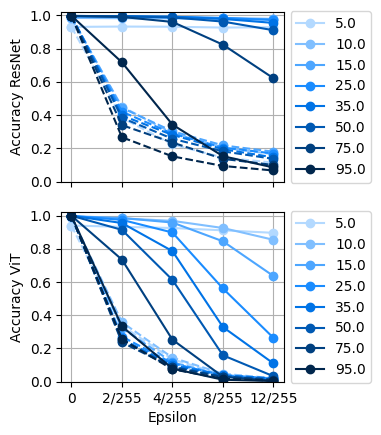

In [36]:
colors={'5.0':'tab:gray','10.0':'tab:blue', '15.0':'tab:red','25.0':'tab:green','35.0':'tab:orange','50.0':'tab:purple','75.0':'tab:brown','95.0':'tab:olive'}
colors={'5.0':'#b3d9ff','10.0':'#80bfff', '15.0':'#4da6ff','25.0':'#1a8cff','35.0':'#0073e6','50.0':'#0059b3','75.0':'#004080','95.0':'#00264d'}

fig, axes = plt.subplots(2,1,figsize=(4.0,4.5))
axs = axes.flatten()
i=0
legend = True

for model in models:
    df = results_jpeg.loc[results_jpeg['model_name'] == model].copy()
    df['strength'] = pd.Categorical(df['strength'], ['5.0','10.0','15.0','25.0','35.0','50.0','75.0','95.0'])
    df = df.sort_values('strength')
    plot_row(df,'_' +model,axs[i],legend, colors=colors)
    i = i+1
    legend = False

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()
fig.savefig('jpeg_abl.pdf',format='pdf',bbox_inches='tight')

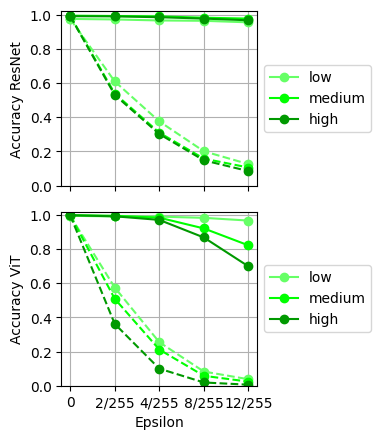

In [35]:
colors={'low':'#66ff66', 'medium':'#00ff00','high':'#009900'}

fig, axes = plt.subplots(2,1,figsize=(4.0,4.5))
axs = axes.flatten()
i=0
legend = True

for model in models:
    df = results_hific.loc[results_hific['model_name'] == model].copy()
    df = df.replace({'strength': {'hi': 'high', 'med': 'medium', 'low': 'low'}})
    df['strength'] = pd.Categorical(df['strength'], ['low', 'medium', 'high'])
    df = df.sort_values('strength')
    plot_row(df,'_' +model,axs[i],legend, colors=colors)
    i = i+1
    legend = False

for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
fig.savefig('hific_abl.pdf',format='pdf',bbox_inches='tight')